In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Spotify_Youtube.csv")

In [3]:
# Display all columns
pd.set_option('display.max_columns', None)

# Data Dictionary
- Variable	      Description
- **Track**	          Name of the song, as visible on the Spotify platform.
- **Artist**	          Name of the artist.
- **Url_spotify**	      The URL of the artist.
- **Album**	          The album in which the song is contained on Spotify.
- **Album_type**	      Indicates if the song is released on Spotify as a single or contained in an album.
- **Uri**	              A Spotify link used to find the song through the API.
- **Danceability**	  Describes how suitable a track is for dancing based on a combination of musical elements. Range 0-1. 1.0 most danceability.
- **Energy**	          Represents a perceptual measure of intensity and activity.Range 0-1. 1 high energy.
- **Key**	              The key the track is in. The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- **Loudness**	      The overall loudness of a track in decibels (dB).
- **Speechiness**	      Detects the presence of spoken words in a track.range 0-1. 1 more spoken words
- **Acousticness**	  A confidence measure of whether the track is acoustic. Range 0-1. 1.0 represents high acoustic.
- **Instrumentalness**  Predicts whether a track contains no vocals. 0-1. 1 most instrumental. 0 is on the vocal side.
- **Liveness**	      Detects the presence of an audience in the recording. Range 0-1.
- **Valence**	          Describes the musical positiveness conveyed by a track. Range: 0-1. 1 postiive. 
- **Tempo**	          The overall estimated tempo of a track in beats per minute (BPM).
- **Duration_ms**	      The duration of the track in milliseconds.
- **Stream**	          Number of streams of the song on Spotify.
- **Url_youtube**	      URL of the video linked to the song on YouTube.
- **Title**	          Title of the video clip on YouTube.
- **Channel**	          Name of the channel that has published the video.
- **Views**	          Number of views on YouTube.
- **Likes**	          Number of likes on YouTube.
- **Comments**	      Number of comments on YouTube.
- **Description**	      Description of the video on YouTube.
- **Licensed**	      Indicates whether the video represents licensed content.
- **Official_video**	  Boolean value indicating if the video found is the official video of the song.


# Data Cleaning

In [4]:
data.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [5]:
print ("Field names: ",  data.columns)

Field names:  Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')


**Useful fields**
- Most Useful:     Artist, Attributes: Danceability, Energy, Loudness, Speechiness, Acousticness, Instrumentalness, Liveness, 
                 Valence, Tempo, Duration_ms (covert to minutes and sec easier to read)
                 Channel
                 Quantifier: Stream, Views, Likes, Comments (count of comments)
- Somewhat Useful: Album, Album_type, Track, Title, Key
- Least Useful:    Licensed, Official_video
- Not Useful:      Url_spotify, Uri, Url_youtube




In [6]:
# Keep only the relevant columns
data_subset =data[['Artist', 'Track', 'Album', 'Album_type',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream']]

In [7]:
data_subset.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [8]:
print("Full data set:", data.shape)
print("Data subset:", data_subset.shape)

Full data set: (20718, 28)
Data subset: (20718, 24)


In [9]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Key               20716 non-null  float64
 7   Loudness          20716 non-null  float64
 8   Speechiness       20716 non-null  float64
 9   Acousticness      20716 non-null  float64
 10  Instrumentalness  20716 non-null  float64
 11  Liveness          20716 non-null  float64
 12  Valence           20716 non-null  float64
 13  Tempo             20716 non-null  float64
 14  Duration_ms       20716 non-null  float64
 15  Title             20248 non-null  object 
 16  Channel           20248 non-null  object


• some columns have missing values (non-null count < 20716).

### Handling Missing Values

In [10]:
# Show number of missing values in each column

missing_values = data_subset.isna().sum()
missing_values

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

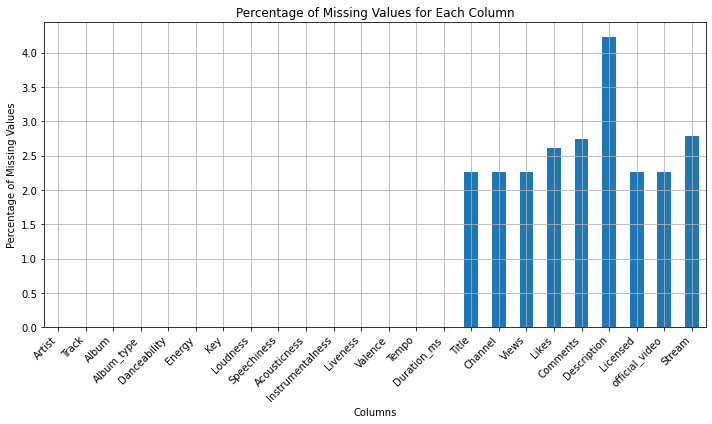

In [11]:
# calculate the percentage of missing values for each column
missing_values_percentage = (data_subset.isna().sum()/len(data_subset)) * 100

#create bar chart
plt.figure(figsize= (10,6))
missing_values_percentage.plot(kind = 'bar')
plt.title("Percentage of Missing Values for Each Column")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
# Impute missing values for columns with few missing values 
columns_with_few_missing = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
                           'Acousticness', 'Instrumentalness', 'Liveness', 'Valence',
                           'Tempo', 'Duration_ms']

for column in columns_with_few_missing:
    data_subset[column].fillna(data_subset[column].median(), inplace=True)


These columns have 2 missing values each, so ive imputed the missing values with the median of the respective columns. This helps preserve overal distribution. 

In [ ]:
# List of columns with many missing values
columns_with_many_missing = ['Title', 'Channel', 'Views', 'Likes', 'Comments', 'Description', 'Licensed', 'official_video', 'Stream']

# Drop rows with missing values in the specified columns
for column in columns_with_many_missing:
    data_subset.dropna(subset=[column], inplace=True)

In [14]:
data_subset.shape

(19171, 24)

19171 rows left after removing dropping the rows with many missing values. 
Originally the data had 20718 rows. Removed 1547 rows. 92.5% of original data left for analysis. 


In [15]:
# Check-validation
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19171 entries, 0 to 20717
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19171 non-null  object 
 1   Track             19171 non-null  object 
 2   Album             19171 non-null  object 
 3   Album_type        19171 non-null  object 
 4   Danceability      19171 non-null  float64
 5   Energy            19171 non-null  float64
 6   Key               19171 non-null  float64
 7   Loudness          19171 non-null  float64
 8   Speechiness       19171 non-null  float64
 9   Acousticness      19171 non-null  float64
 10  Instrumentalness  19171 non-null  float64
 11  Liveness          19171 non-null  float64
 12  Valence           19171 non-null  float64
 13  Tempo             19171 non-null  float64
 14  Duration_ms       19171 non-null  float64
 15  Title             19171 non-null  object 
 16  Channel           19171 non-null  object

In [16]:
# Show number of missing values in each column
missing_values =data_subset.isna().sum()
print(missing_values)

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Description         0
Licensed            0
official_video      0
Stream              0
dtype: int64


In [17]:
data_subset.describe(include=['object', 'category'])

,Artist,Track,Album,Album_type,Title,Channel,Description,Licensed,official_video
count,19171,19171,19171,19171,19171,19171,19171,19171,19171
unique,2040,16548,11224,3,17174,6200,16821,2,2
top,Cuco,El Ultimo Adiós - Varios Artistas Version,Greatest Hits,album,Color Esperanza 2020 - Various Artists (Offici...,T-Series,,True,True
freq,10,23,28,13846,18,237,107,13703,15221


In [18]:
data_subset['Licensed'].value_counts()

True     13703
False     5468
Name: Licensed, dtype: int64

In [19]:
data_subset['official_video'].value_counts()

True     15221
False     3950
Name: official_video, dtype: int64

### Observations- Categorical data

Original No. of rows: 20718. After imputing and removing rows with missing data, we are left with 19171 rows.

**Spotify- Artist** 
- 2040 unique artist.
- artist freq ranges from 1-10, decent number of artist with frequency of 10 
- no missing data

**Spotify- Track**
- most played song is El Ultimo Adios-Varios Artistas Version. Frequency of appearance 24
- It ranges from 1-24. 
- Different rendition of the song, or songs with same title

**Spotify- Album & Album Type**
- Decent number of albums: 11937 unique albums
- Frequency ranges from 1-30
- 3 different types of album: Album (14926), Single (5004), Compilation (788). Album 3x more than singles

**YouTube-Title**
- frequency occurance range from 1-18 (vs 1-24 in Spotify-Track). The one that appeared 18 time is of different track.

**YouTube-Channel**
- 6200 channel, highest freqency: T-series. 

**YouTube-Description**
- 16821 unique, which means some comments are the same. 85.9% unique.

**YouTube- Licensed**
- most content are licensed. 71.5% [13703/ (19171)]

**YouTube- Official_video**
- most are official video. 79.4% [15221/ (19171)]



In [20]:
#summary statistics of numerical columns
data_subset.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,19171.000000,19171.000000,19171.000000,19171.000000,19171.000000,19171.000000,19171.000000,19171.000000,19171.000000,19171.000000,1.917100e+04,1.917100e+04,1.917100e+04,1.917100e+04,1.917100e+04
mean,0.621179,0.636152,5.292629,-7.615249,0.094941,0.287812,0.055473,0.191318,0.528268,120.607311,2.247606e+05,9.719374e+07,6.823262e+05,2.838548e+04,1.382732e+08
std,0.165528,0.213434,3.579854,4.617491,0.104928,0.285624,0.192764,0.165214,0.244990,29.587536,1.278435e+05,2.799929e+08,1.820507e+06,1.977928e+05,2.477245e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,2.600000e+01,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.520000,0.510000,2.000000,-8.745000,0.035700,0.043600,0.000000,0.094100,0.338000,96.998000,1.802670e+05,2.070556e+06,2.447500e+04,5.830000e+02,1.787071e+07
50%,0.639000,0.667000,5.000000,-6.504000,0.050600,0.188000,0.000002,0.125000,0.535000,119.969000,2.133140e+05,1.569059e+07,1.332930e+05,3.516000e+03,5.038029e+07
75%,0.742000,0.798000,8.000000,-4.919000,0.104000,0.469000,0.000436,0.234000,0.724000,139.946000,2.519530e+05,7.369039e+07,5.423445e+05,1.494100e+04,1.407520e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


### Observations- Numerical data

**Danceability**
- average danceability is towards the higher end (0.621), suggesting
it's music people can dance to.
- Range is quite borad. Min 0 to 0.975.

**Energy**
- average danceability is towards the higher end (0.64), suggesting
it's music people can dance to.
- Range is quite borad. Min 0 to 1.

**Key**
- special encoding- should be treated as a string, not numerical. 

**Loudness**
- ranges from -46.3 to 0.92 (loudest)

**Speechiness**
- The average speciness is relatively low (0.095), suggesting minimal spoken words in a songs. 
- however, it's quite braod range (0 to 0.96), reflecting diverse acoustic characteristics.

**Acousticness**
- The mean acousticness is moderate (0.289), indicating a significant presence of acoustic elements in songs.
- considerable variability in acousticness, reflecting diverse acoustic characteristics.

**Instrumentalness**
- The mean instrumentalness is relatively low (0.055), suggesting vocals are present in most songs.
- some songs are entirely instrumental, as indicated by high instrumentalness values.

**Liveness**
- average liveness is moderate (0.191), indicating a moderate degree of live performance quality.
- Variability in liveness exists across the dataset, with some songs exhibiting higher live performance attributes.

**Valence**
- average valence is moderate (0.529), indicating songs tend to convey a positive emotional tone.
- There's moderate variability in valence, suggesting diversity in emotional expression.

**Tempo**
- The average tempo is approximately 120.61 BPM, suggesting a moderate pace overall.
- Considerable variability in tempo exists, reflecting diverse rhythmic characteristics.

**Duration**
- The mean song duration is approximately 224,628 milliseconds (3.74min) , with considerable variability.
- Songs vary widely in duration, ranging from shorter tracks to longer compositions.

**Engagement Metrics (Views, Likes, Comments, Streams)**
- These metrics show wide variability across the dataset, indicating differences in song popularity and engagement.
- Some songs have high engagement metrics, while others have lower levels of interaction.


# Exploratory Data Analyses (EDAs)

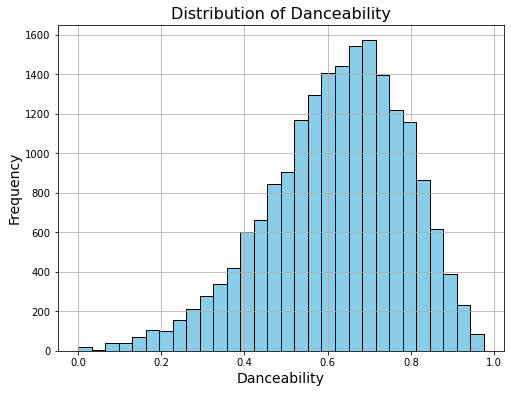


### Observations for Danceability:


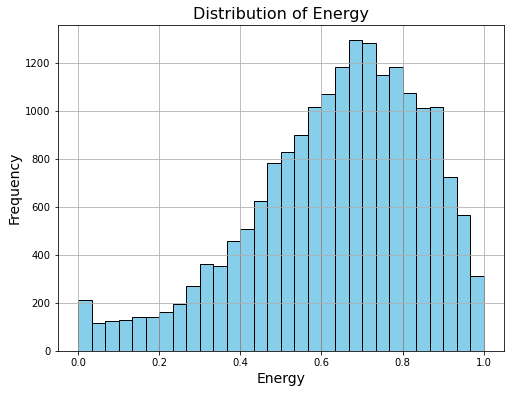


### Observations for Energy:


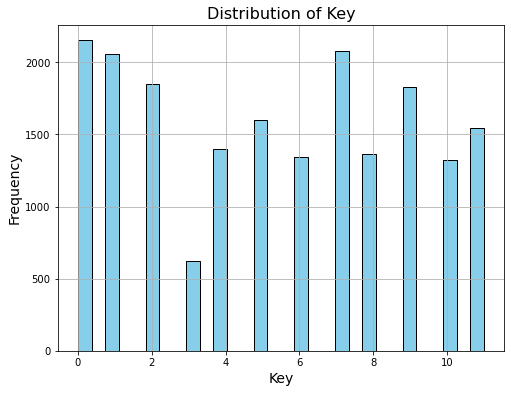


### Observations for Key:


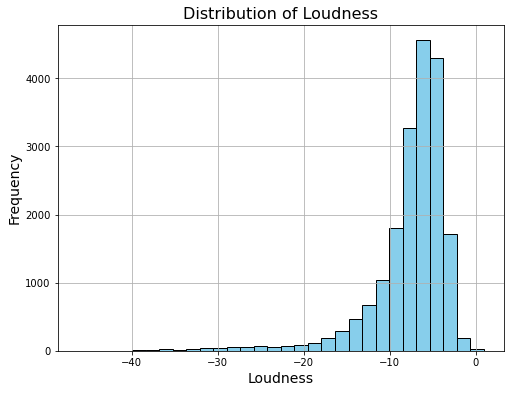


### Observations for Loudness:


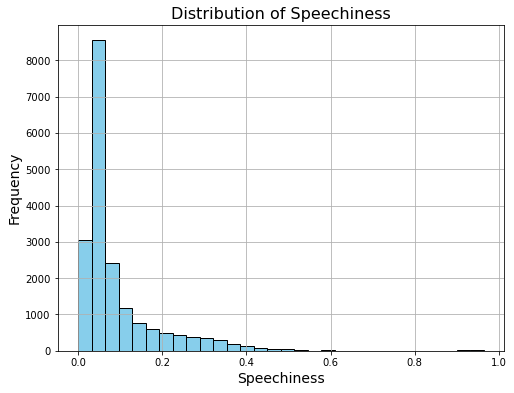


### Observations for Speechiness:
- The distribution appears to be right-skewed, with most songs having low speechiness values.
- A small portion of songs exhibit higher speechiness, indicating the presence of spoken words.


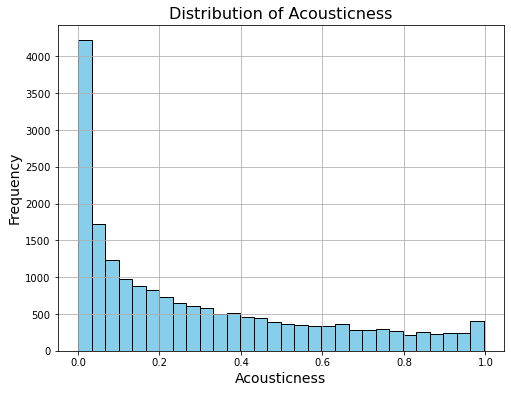


### Observations for Acousticness:
- The distribution seems relatively evenly spread, with a peak around lower values.
- There's a noticeable proportion of songs with higher acousticness, suggesting a significant acoustic component.


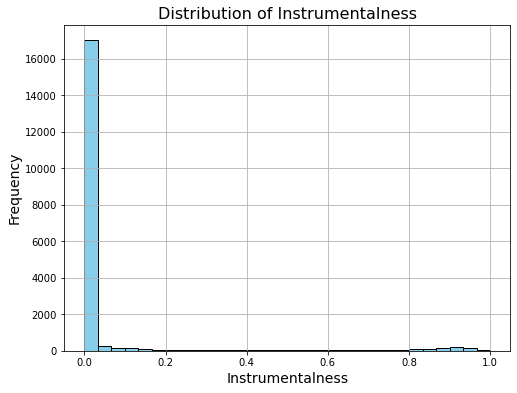


### Observations for Instrumentalness:
- The distribution is heavily skewed towards lower values, implying most songs contain vocals.
- Some songs are entirely instrumental, indicated by a long tail on the right side.


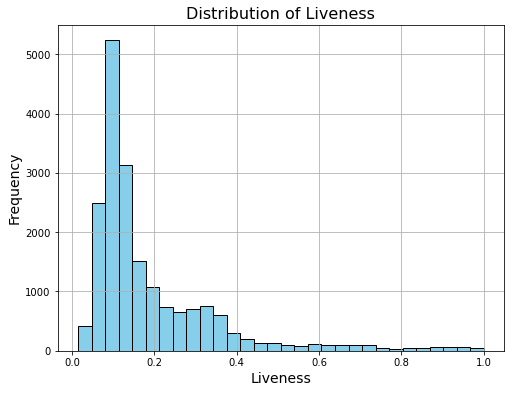


### Observations for Liveness:
- The distribution appears somewhat right-skewed, with the majority of songs having lower liveness values.
- Fewer songs exhibit higher liveness, indicating a smaller proportion of live recordings.


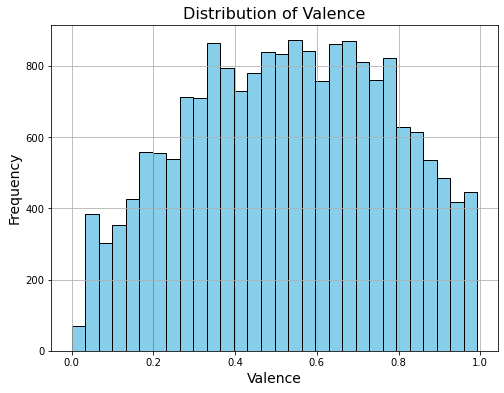


### Observations for Valence:
- The distribution seems relatively symmetric, centered around moderate values.
- There's variability in valence, with songs conveying both positive and negative emotional tones.


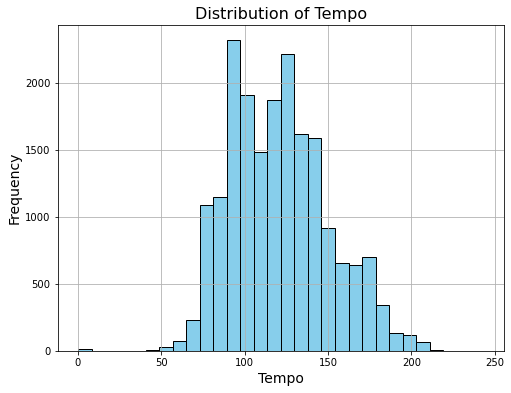


### Observations for Tempo:
- The distribution appears approximately normal, centered around a moderate tempo.
- Some outliers have very low or very high tempo values, but most songs fall within a moderate tempo range.


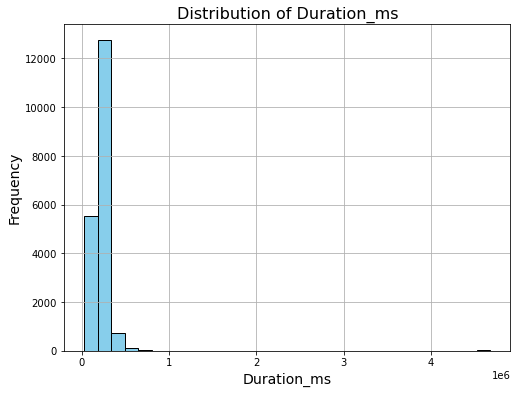


### Observations for Duration_ms:
- The distribution is right-skewed, with a peak around shorter durations.
- Some songs have much longer durations, indicating variability in track length.


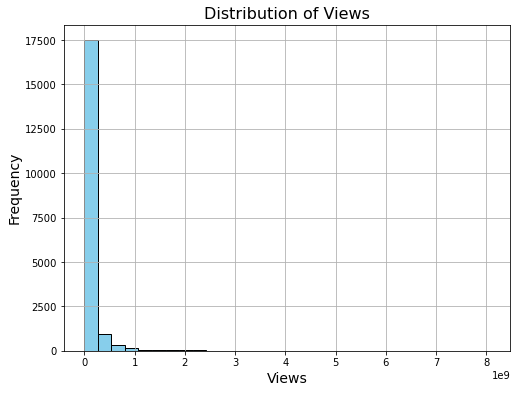


### Observations for Views:


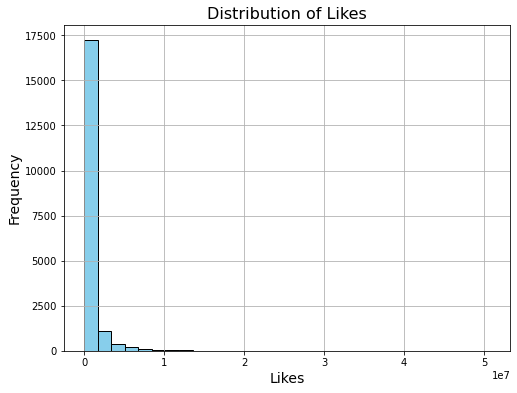


### Observations for Likes:


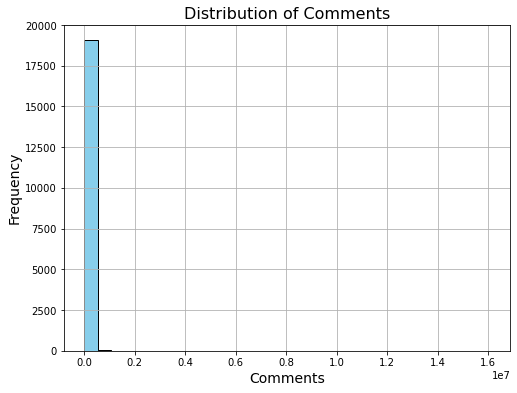


### Observations for Comments:


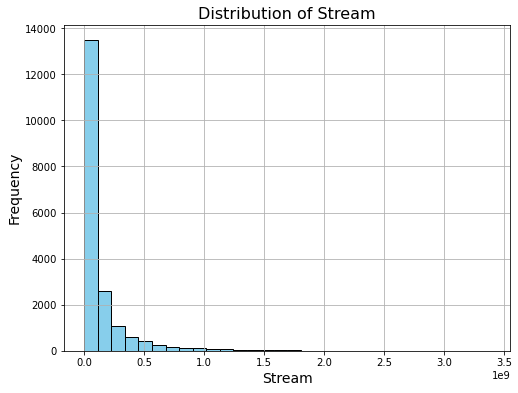


### Observations for Stream:


In [21]:
# Select numerical columns
numerical_columns = data_subset.select_dtypes(include=['float64']).columns

# Plot histograms for each numerical feature
for column in numerical_columns:
    plt.figure(figsize=(8,6))
    plt.hist(data_subset[column], bins =30, color = 'skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize =16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize =14)
    plt.grid(True)
    plt.show()

    
# Print observations
    print(f"\n### Observations for {column}:")
    if column == 'Speechiness':
        print("- The distribution appears to be right-skewed, with most songs having low speechiness values.")
        print("- A small portion of songs exhibit higher speechiness, indicating the presence of spoken words.")
    elif column == 'Acousticness':
        print("- The distribution seems relatively evenly spread, with a peak around lower values.")
        print("- There's a noticeable proportion of songs with higher acousticness, suggesting a significant acoustic component.")
    elif column == 'Instrumentalness':
        print("- The distribution is heavily skewed towards lower values, implying most songs contain vocals.")
        print("- Some songs are entirely instrumental, indicated by a long tail on the right side.")
    elif column == 'Liveness':
        print("- The distribution appears somewhat right-skewed, with the majority of songs having lower liveness values.")
        print("- Fewer songs exhibit higher liveness, indicating a smaller proportion of live recordings.")
    elif column == 'Valence':
        print("- The distribution seems relatively symmetric, centered around moderate values.")
        print("- There's variability in valence, with songs conveying both positive and negative emotional tones.")
    elif column == 'Tempo':
        print("- The distribution appears approximately normal, centered around a moderate tempo.")
        print("- Some outliers have very low or very high tempo values, but most songs fall within a moderate tempo range.")
    elif column == 'Duration_ms':
        print("- The distribution is right-skewed, with a peak around shorter durations.")
        print("- Some songs have much longer durations, indicating variability in track length.")

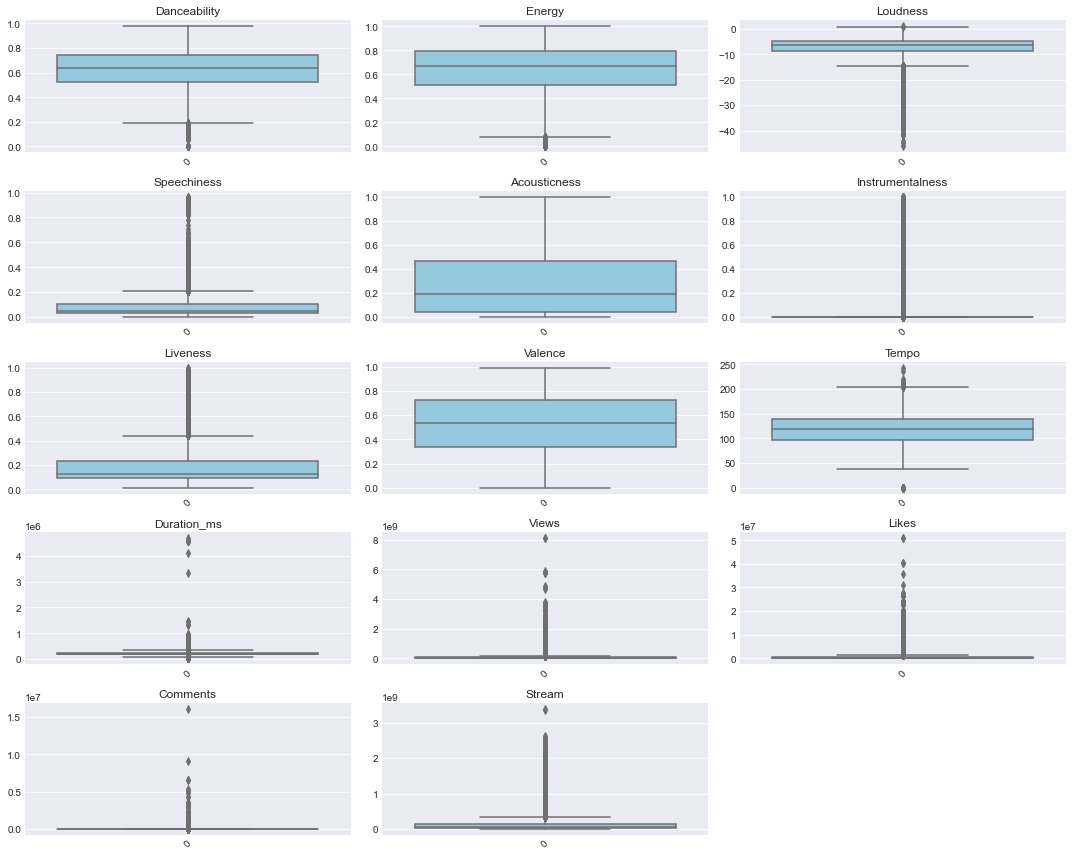

In [22]:
# Set the style and color palette
plt.style.use('seaborn-darkgrid')
sns.set_palette('pastel')

# Create subplots for each numerical feature
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)

# List of numerical features
numerical_features = ['Danceability', 'Energy','Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 
                      'Liveness', 'Valence', 'Tempo', 'Duration_ms', 
                      'Views', 'Likes', 'Comments', 'Stream']

# Plot box plots for each numerical feature
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.boxplot(data=data_subset[feature], ax=axs[row, col], color='skyblue')
    axs[row, col].set_title(feature)
    axs[row, col].set_xlabel('')
    axs[row, col].set_ylabel('')
    axs[row, col].tick_params(axis='x', labelrotation=45)

# Remove empty subplots
for i in range(len(numerical_features), len(axs.flatten())):
    fig.delaxes(axs.flatten()[i])

# Show the plot
plt.tight_layout()
plt.show()

### Observations-  Numerical data

**Speechiness:**
- The distribution of speechiness appears to be skewed towards lower values, with a few outliers having higher speechiness.
- Most songs in the dataset have relatively low speechiness, but there are some exceptions with higher speechiness values.

**Acousticness:**
- The distribution of acousticness is varied, with a wide range of values.
- While a significant number of songs have low acousticness, indicating a higher presence of electronic or amplified sounds, there are also many songs with high acousticness, suggesting a more natural or unplugged sound.

**Instrumentalness:**
- Most songs have low instrumentalness, indicating the presence of vocals.
- However, there are notable outliers with high instrumentalness, suggesting instrumental tracks or sections within songs.

**Liveness:**
- The distribution of liveness values varies, with some songs having higher liveness indicative of live recordings or performances.
- However, the majority of songs have lower liveness values, suggesting studio recordings.

**Valence:**
- The distribution of valence values appears relatively balanced, with songs conveying both positive and negative emotional tones.
- However, there are slightly more songs with higher valence, indicating a prevalence of positive emotions in the dataset.

**Tempo:**
- The tempo distribution spans a wide range of values, indicating diverse rhythmic characteristics across songs.
- Most songs have moderate tempos, but there are outliers with both very slow and very fast tempos.

**Duration_ms:**
- The distribution of song durations is skewed towards shorter durations, with a few outliers representing longer tracks.
- Most songs in the dataset are of moderate duration, but there is variability in track length.

**Engagement (Views, Likes, Comments, and Stream):**
- The box plots for these features show a wide range of values, indicating variability in song popularity and engagement metrics.
- There are many outliers in these distributions, representing songs with exceptionally high or low engagement levels.

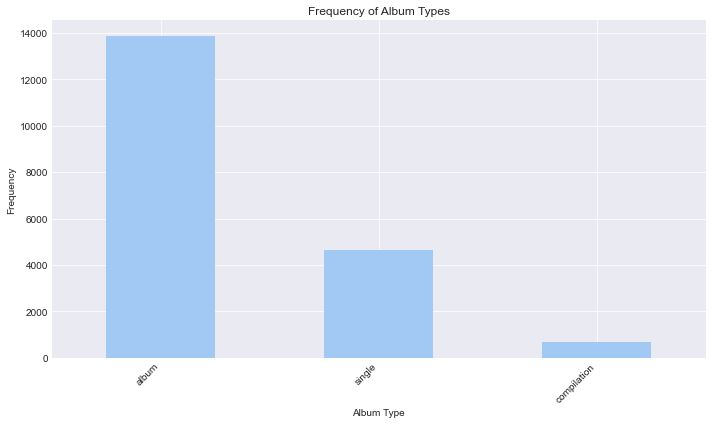

In [23]:
album_type_counts = data_subset['Album_type'].value_counts()

# Plot bar graph
plt.figure(figsize=(10, 6))
album_type_counts.plot(kind='bar')
plt.title('Frequency of Album Types')
plt.xlabel('Album Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

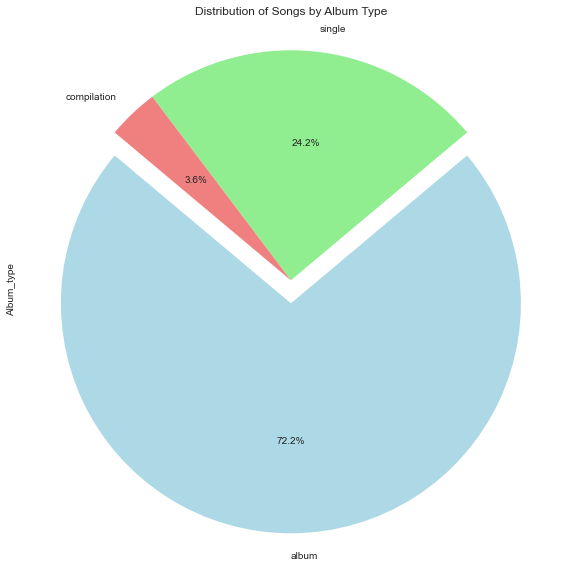

In [24]:
album_type_counts = data_subset['Album_type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']

# Calculate explode values dynamically based on the number of categories
explode = [0.1] + [0] * (len(album_type_counts) - 1)

album_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Distribution of Songs by Album Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

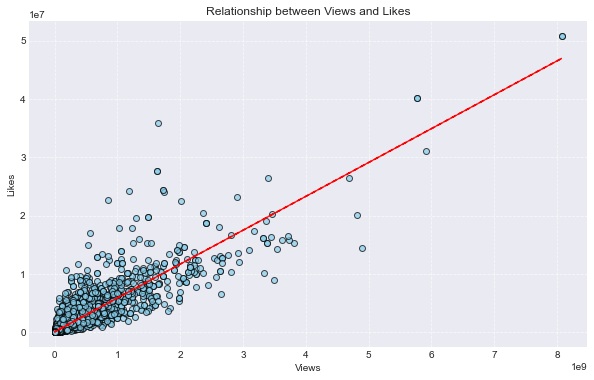

In [25]:
# Scatter plot of Views vs. Likes
plt.figure(figsize=(10, 6))
plt.scatter(data_subset['Views'], data_subset['Likes'], color='skyblue', alpha=0.7, edgecolors='black')
plt.title('Relationship between Views and Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a trendline
z = np.polyfit(data_subset['Views'], data_subset['Likes'], 1)
p = np.poly1d(z)
plt.plot(data_subset['Views'],p(data_subset['Views']),"r--")

plt.show()

### Observation: Views vs Likes
There is a positive correlation between the number of views and the number of likes, indicating that songs with more views tend to have more likes. 
However, the relationship is not completely linear, suggesting that other factors may influence the number of likes.

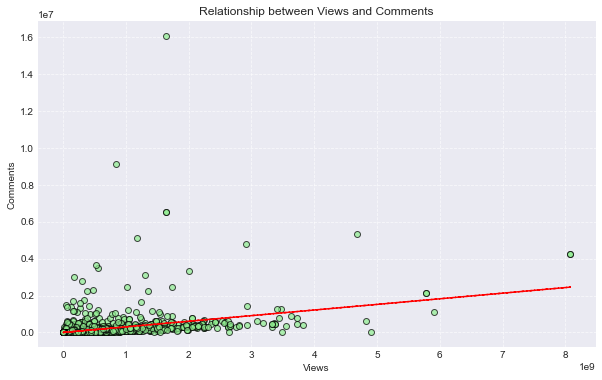

In [26]:
# Scatter plot of Views vs. Comments
plt.figure(figsize=(10, 6))
plt.scatter(data_subset['Views'], data_subset['Comments'], color='lightgreen', alpha=0.7, edgecolors='black')
plt.title('Relationship between Views and Comments')
plt.xlabel('Views')
plt.ylabel('Comments')
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a trendline
z = np.polyfit(data_subset['Views'], data_subset['Comments'], 1)
p = np.poly1d(z)
plt.plot(data_subset['Views'],p(data_subset['Views']),"r--")

plt.show()

### Observation: Views vs Comments

Similar to views vs. likes, there is a positive correlation between the number of views and the number of comments. Songs with more views tend to have more comments, but there seems to be additional influence. 

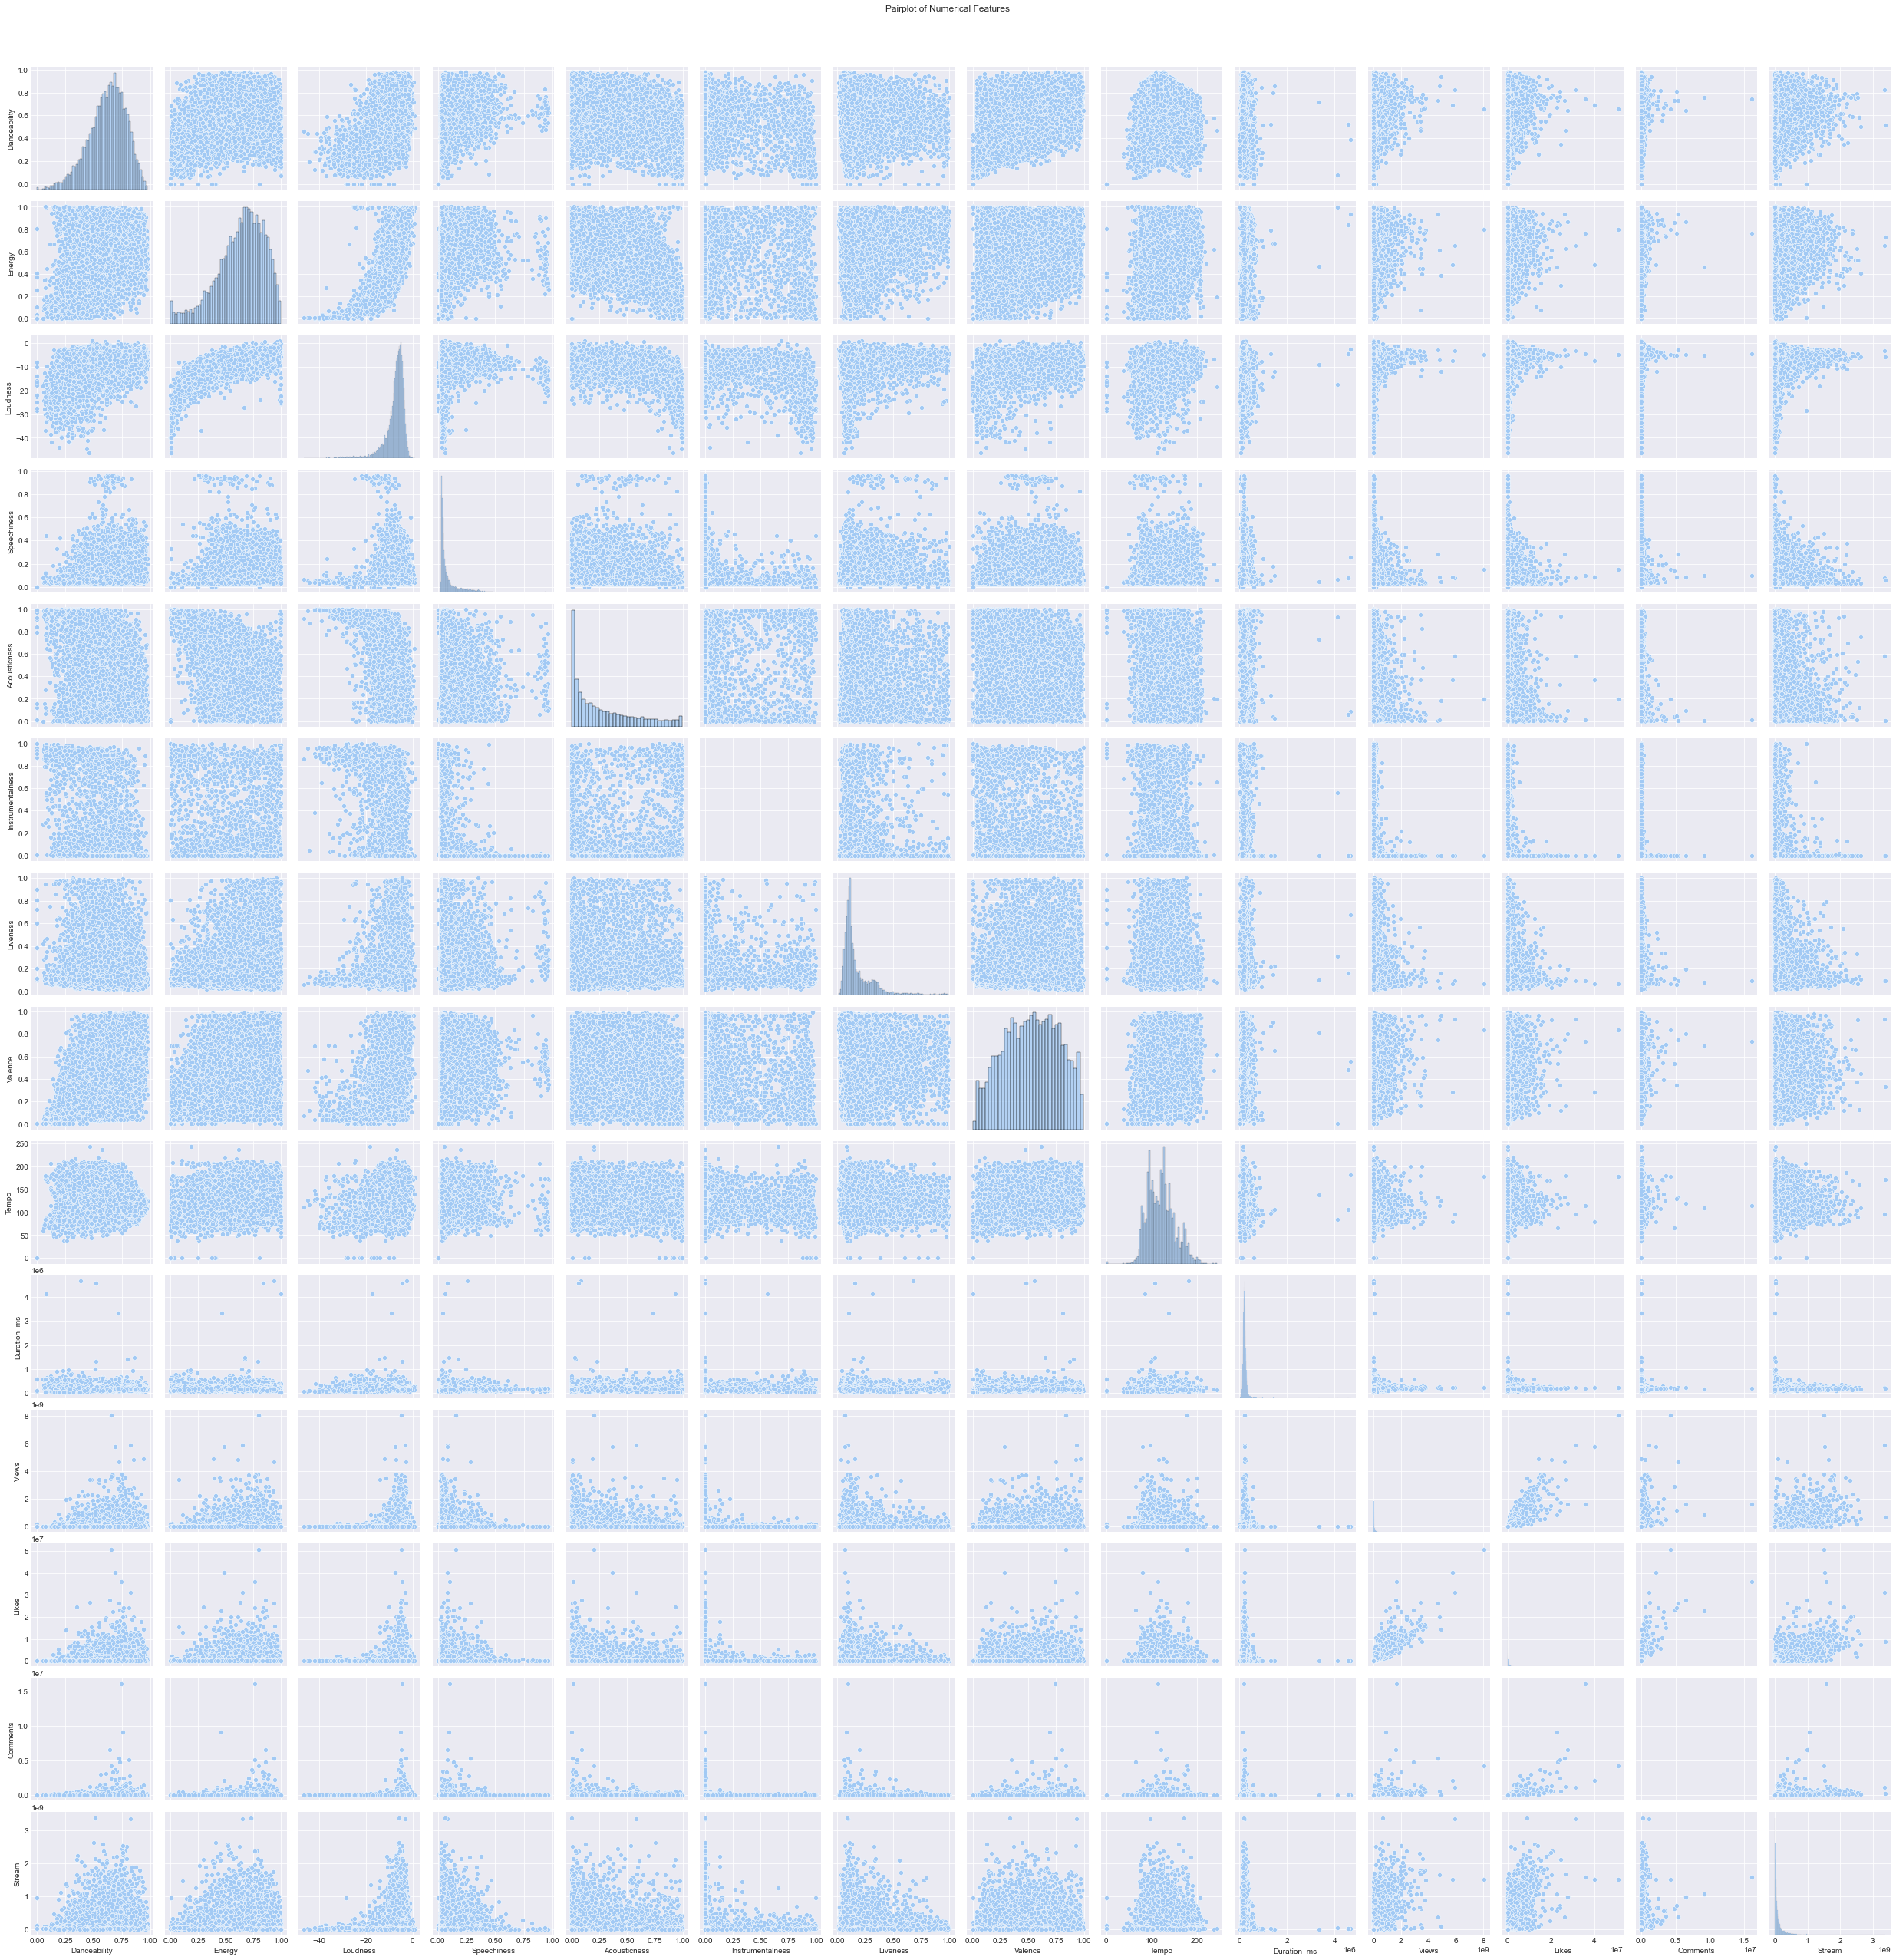

In [27]:
# Select numerical features for the pairplot
numerical_features = ['Danceability', 'Energy','Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 
                      'Liveness', 'Valence', 'Tempo', 'Duration_ms', 
                      'Views', 'Likes', 'Comments', 'Stream']

# Create a pairplot
sns.pairplot(data_subset[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()